In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<BarContainer object of 200 artists>

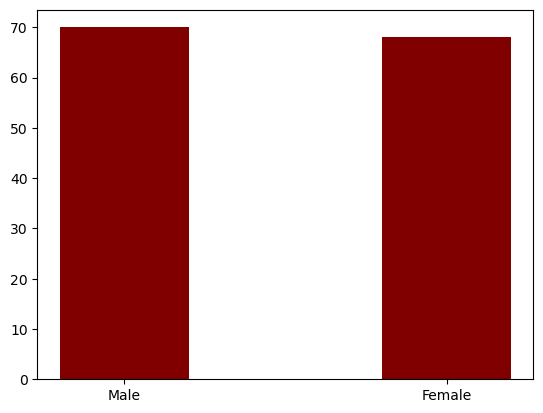

In [5]:
mpl.bar(dataset['Gender'], dataset['Age'], color ='maroon', width = 0.4)

<BarContainer object of 200 artists>

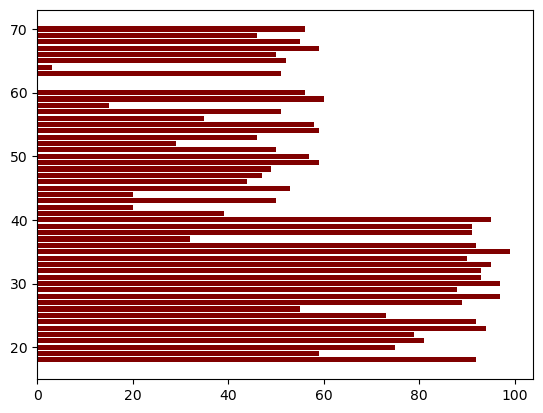

In [6]:
mpl.barh(dataset['Age'], dataset['Spending Score (1-100)'], color ='maroon')

<BarContainer object of 200 artists>

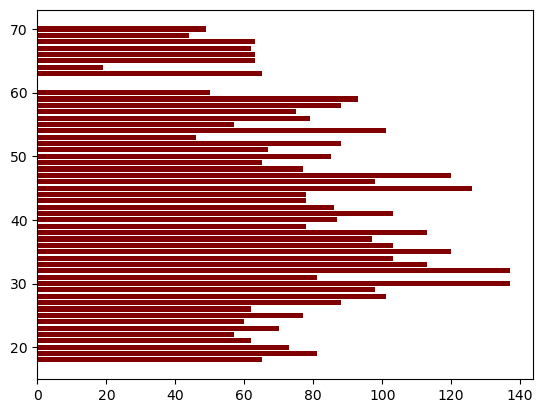

In [7]:
mpl.barh(dataset['Age'], dataset['Annual Income (k$)'], color ='maroon')

In [8]:
freq = dataset['Gender'].value_counts()

([<matplotlib.patches.Wedge at 0x2aa10316ae0>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')])

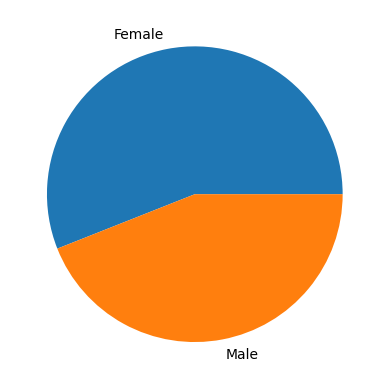

In [9]:
mpl.pie(freq.values , labels=freq.index)

In [10]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
import seaborn as sns

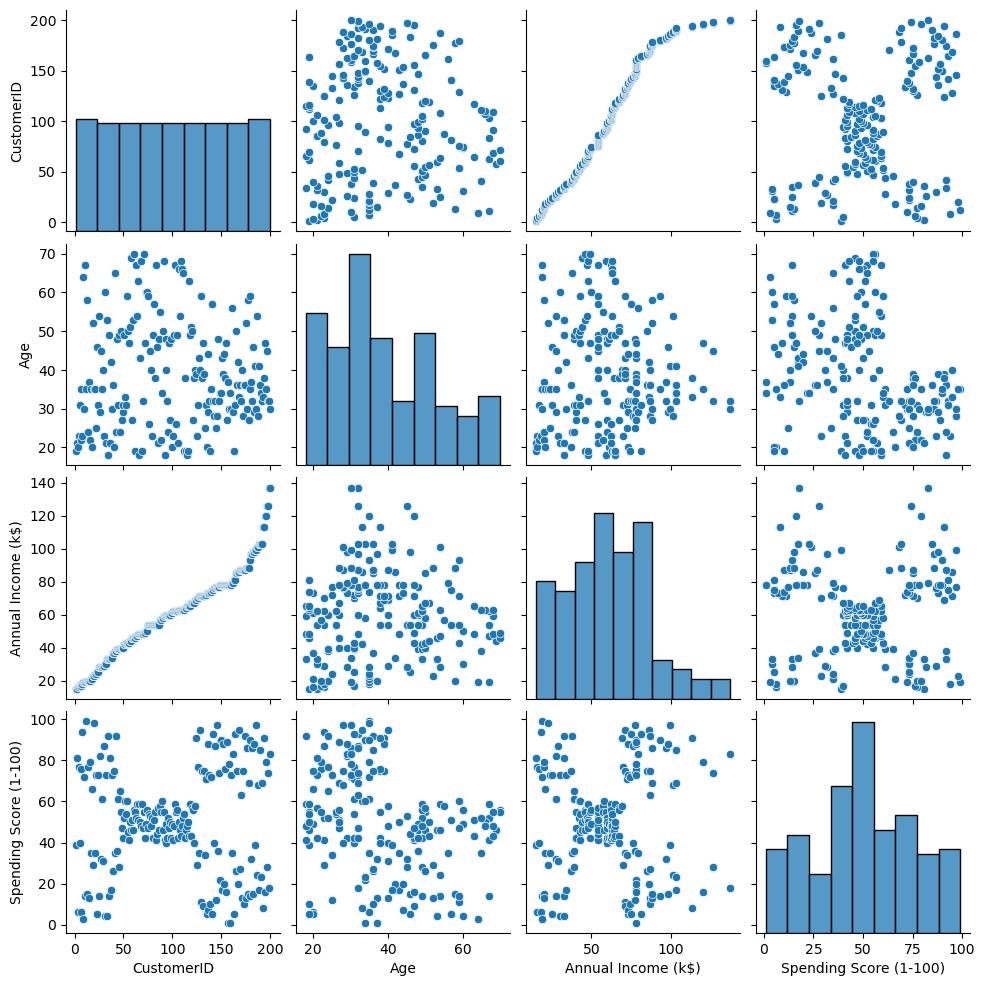

In [13]:
sns.pairplot(dataset)

<Axes: title={'center': 'Unclustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

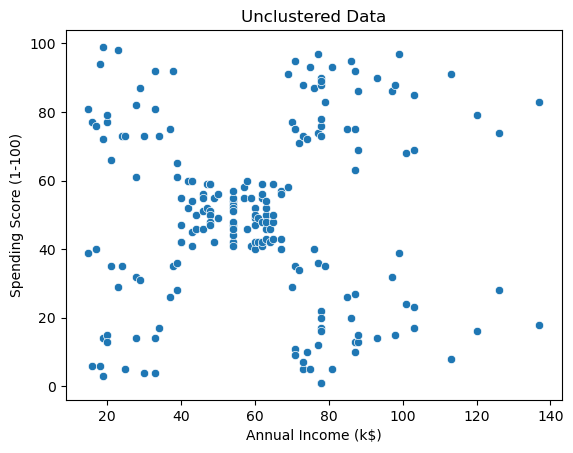

In [14]:
mpl.title("Unclustered Data")
sns.scatterplot(x = dataset['Annual Income (k$)'] , y = dataset['Spending Score (1-100)'])

In [15]:
from sklearn.cluster import KMeans

In [16]:
x = dataset.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [17]:
model = KMeans(n_clusters = 3)

In [18]:
model.fit(x)

C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [19]:
labels = model.predict(x)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [20]:
model.inertia_

106348.37306211118

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
score = silhouette_score(x , labels)
score

0.46761358158775435

In [23]:
sse = []
for i in range(2 , 16):
    model = KMeans(n_clusters = i)
    model.fit(x)
    sse.append(model.inertia_)

C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [24]:
sse

[184609.98434090617,
 106348.37306211118,
 73679.78903948836,
 44454.47647967974,
 38797.9027638142,
 30273.394312070042,
 28081.012638188364,
 22900.226153870637,
 24951.2469084777,
 17782.879112554117,
 16851.482758443108,
 15124.248135556203,
 12785.790446336036,
 13257.314083380388]

In [25]:
len(sse)

14

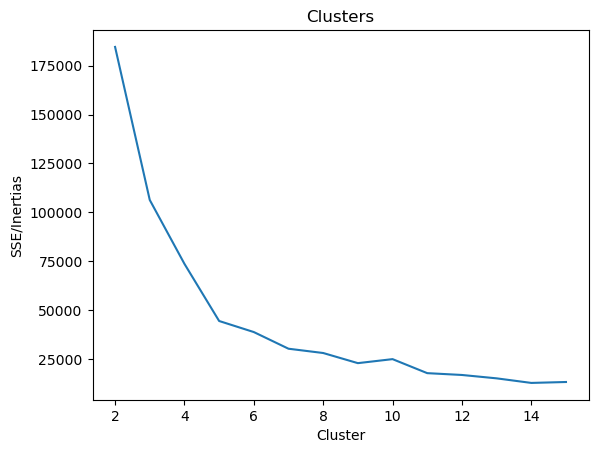

In [26]:
mpl.title("Clusters")
sns.lineplot(x = range(2 , 16) , y = sse)
mpl.xlabel("Cluster")
mpl.ylabel("SSE/Inertias")
mpl.show()

In [27]:
sil_score = []
for i in range(2 , 16):
    model = KMeans(n_clusters = i)
    model.fit(x)
    labels = model.predict(x)
    score = silhouette_score(x , labels)
    sil_score.append(score)

C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [28]:
sil_score

[0.3774913479961559,
 0.46761358158775435,
 0.4937945814354117,
 0.553931997444648,
 0.5476081950624869,
 0.4582559900980908,
 0.4563121502280685,
 0.4247062934246928,
 0.39220861337279045,
 0.4344802100728903,
 0.4436061253731669,
 0.44476441273203365,
 0.41148929711021365,
 0.4147424065887158]

Text(0, 0.5, 'Silhoutte score')

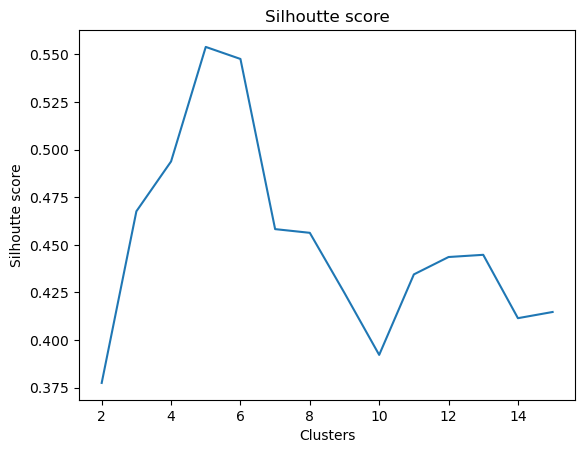

In [29]:
mpl.title("Silhoutte score")
sns.lineplot(x = range(2 , 16) , y = sil_score)
mpl.xlabel('Clusters')
mpl.ylabel('Silhoutte score')

Text(0, 0.5, 'Silhoutte score')

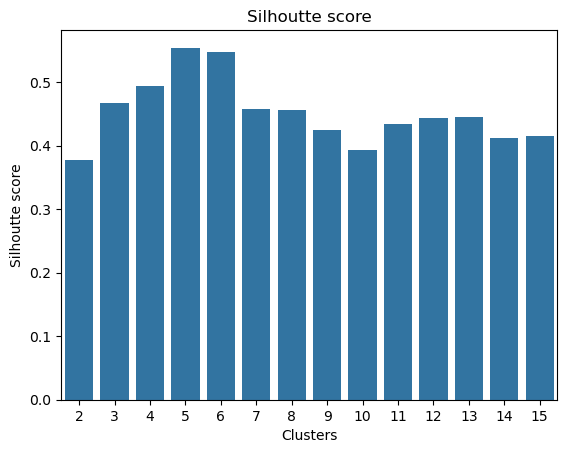

In [30]:
mpl.title("Silhoutte score")
sns.barplot(x = range(2 , 16) , y = sil_score)
mpl.xlabel('Clusters')
mpl.ylabel('Silhoutte score')

In [31]:
from sklearn.model_selection import train_test_split
X_train , X_test = train_test_split(x , test_size = 0.2)

In [32]:
len(X_train)

160

In [33]:
len(X_test)

40

In [34]:
model = KMeans(n_clusters = 5)

In [35]:
model.fit(X_train)

C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [36]:
labels = model.predict(X_train)

In [37]:
model.inertia_

37574.983320600964

In [38]:
sil = silhouette_score(X_train , labels)
sil

0.540162361129404

In [39]:
labels2 = model.predict(X_test)

In [40]:
sil = silhouette_score(X_test , labels2)
sil

0.5643499884279631

In [41]:
centers = model.cluster_centers_
centers

array([[86.94117647, 82.55882353],
       [27.8125    , 76.9375    ],
       [88.60714286, 17.78571429],
       [55.15151515, 49.27272727],
       [25.5625    , 19.8125    ]])

<Axes: title={'center': 'Clustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

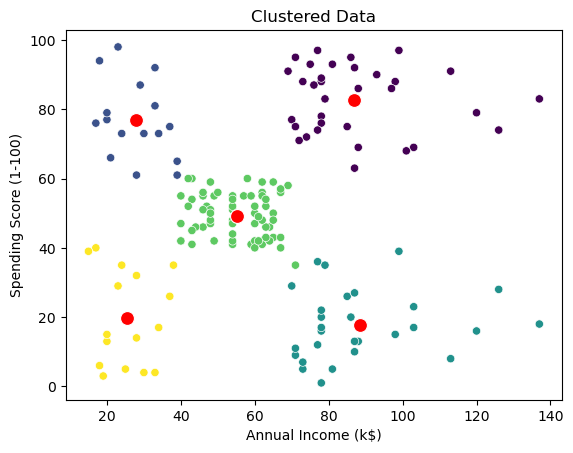

In [42]:
mpl.title("Clustered Data")
sns.scatterplot(x = X_train['Annual Income (k$)'] , y = X_train['Spending Score (1-100)'] , c = labels)
sns.scatterplot(x = centers[:,0] , y = centers[:,1] , s=100 , color = 'red')

In [58]:
from sklearn.cluster import AgglomerativeClustering

In [59]:
model2 = AgglomerativeClustering(n_clusters = 5)

In [60]:
cluster = model2.fit(X_train)

In [61]:
labels = cluster.labels_
labels

array([0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 4, 1, 3, 1, 1, 1, 1, 0, 2, 2,
       0, 2, 0, 4, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 3, 0, 2,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 3, 1, 2, 3, 4, 2, 2, 1, 0, 2, 0, 3, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 2, 0, 0, 2, 0, 3, 0, 1, 2, 0,
       0, 3, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0, 3, 1, 0, 2, 0, 4, 0, 0, 2,
       0, 3, 0, 0, 0, 1, 0, 1, 4, 0, 3, 3, 0, 1, 1, 0, 2, 0, 2, 1, 0, 1,
       0, 0, 4, 1, 1, 1, 1, 1, 3, 0, 2, 1, 0, 0, 4, 0, 0, 2, 0, 4, 4, 0,
       0, 3, 0, 0, 1, 0], dtype=int64)

In [62]:
sil = silhouette_score(X_train , labels)
sil

0.5153809269015317

In [63]:
cluster2 = model2.fit(X_test)

In [64]:
labels2 = cluster.labels_
labels2

array([0, 4, 3, 2, 0, 4, 0, 4, 0, 1, 1, 4, 4, 4, 2, 2, 3, 4, 1, 1, 2, 2,
       3, 3, 2, 0, 1, 4, 2, 4, 4, 0, 0, 0, 1, 4, 3, 4, 0, 1], dtype=int64)

In [65]:
sil2 = silhouette_score(X_test , labels2)
sil2

0.570375500214123

<Axes: title={'center': 'Clustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

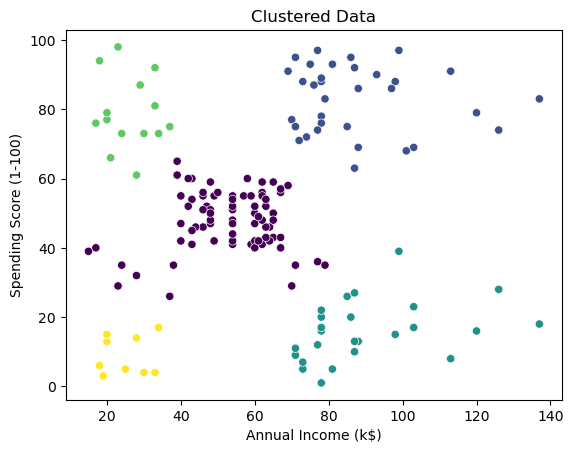

In [66]:
mpl.title("Clustered Data")
sns.scatterplot(x = X_train['Annual Income (k$)'] , y = X_train['Spending Score (1-100)'] , c = labels)
# sns.scatterplot(x = centers[:,0] , y = centers[:,1] , s=100 , color = 'red')